In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
#READ IN THE DATA
filepath = "/Users/bram/dev/projects/Taxi-Challenge/"

taxi_rides = pd.read_csv(filepath + 'cleaned_taxi_rides.csv')


In [6]:
taxi_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712075 entries, 0 to 712074
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        712075 non-null  int64  
 1   VendorID          712075 non-null  int64  
 2   passenger_count   712075 non-null  int64  
 3   trip_distance     712075 non-null  float64
 4   RatecodeID        712075 non-null  int64  
 5   PULocationID      712075 non-null  int64  
 6   DOLocationID      712075 non-null  int64  
 7   payment_type      712075 non-null  int64  
 8   tip_amount        712075 non-null  float64
 9   total_amount      712075 non-null  float64
 10  PUborough         712075 non-null  object 
 11  PUzone            712075 non-null  object 
 12  PUservice_zone    712075 non-null  object 
 13  DOborough         712075 non-null  object 
 14  DOzone            712075 non-null  object 
 15  DOservice_zone    712075 non-null  object 
 16  Pickup_hour       71

In [7]:
taxi_rides = taxi_rides[taxi_rides['payment_type'] == 1]
taxi_rides = taxi_rides.drop('payment_type',axis = 1)


In [8]:
VendorID = taxi_rides.pop('VendorID')
taxi_rides['CMT'] = (VendorID == 1)*1.0
taxi_rides['VeriFone'] = (VendorID == 2)*1.0

RatecodeID = taxi_rides.pop('RatecodeID')
taxi_rides['negotiated_fare'] = (RatecodeID == 5)*1.0
taxi_rides['group_ride'] = (RatecodeID == 6)*1.0

airport = taxi_rides.pop('airport')
taxi_rides['from_airport'] = (airport == 'from')*1.0
taxi_rides['to_airport'] = (airport == 'towards')*1.0

In [9]:
corr = taxi_rides.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount,Pickup_hour,Pickup_day,Dropoff_hour,Dropoff_day,income,trip_time,speed,tip_rate,pm,new_year,CMT,VeriFone,negotiated_fare,group_ride,from_airport,to_airport
Unnamed: 0,1.000000,-0.001132,0.137302,-0.074071,-0.057201,0.112833,0.143391,-0.036078,0.021886,-0.034798,0.022778,0.148892,0.159270,0.043751,-0.009124,-0.051968,-0.021753,0.000728,-0.000728,0.016110,0.001129,0.069396,0.099780
passenger_count,-0.001132,1.000000,0.027827,-0.005397,-0.003428,0.022473,0.026802,-0.001701,-0.035519,-0.000999,-0.035391,0.026139,0.022253,0.027189,-0.000430,0.006200,0.036212,-0.255330,0.255330,-0.000777,-0.000749,0.017727,0.017925
trip_distance,0.137302,0.027827,1.000000,-0.115638,-0.117142,0.776012,0.962984,0.013856,-0.070365,0.014643,-0.063344,0.964787,0.829663,0.730536,-0.062277,0.008754,0.063434,-0.037508,0.037508,0.039070,-0.000775,0.688668,0.338012
PULocationID,-0.074071,-0.005397,-0.115638,1.000000,0.079234,-0.088615,-0.111027,0.033917,0.040584,0.034705,0.039322,-0.112298,-0.097544,-0.091939,0.011808,0.033898,-0.043516,0.009478,-0.009478,-0.005740,0.001559,-0.118062,0.005536
DOLocationID,-0.057201,-0.003428,-0.117142,0.079234,1.000000,-0.094971,-0.124160,0.021405,0.042850,0.021454,0.041581,-0.126584,-0.119288,-0.078153,0.014841,0.021451,-0.046558,0.007753,-0.007753,-0.019270,0.000021,-0.046949,-0.047586
tip_amount,0.112833,0.022473,0.776012,-0.088615,-0.094971,1.000000,0.856445,0.016718,-0.033010,0.019253,-0.027864,0.857834,0.695764,0.525540,0.395326,0.020069,0.032347,-0.026998,0.026998,0.057029,-0.000484,0.554999,0.278628
total_amount,0.143391,0.026802,0.962984,-0.111027,-0.124160,0.856445,1.000000,0.018286,-0.037497,0.021554,-0.031149,0.996614,0.862357,0.648876,0.013430,0.020230,0.034964,-0.031542,0.031542,0.099115,-0.001227,0.654993,0.339688
Pickup_hour,-0.036078,-0.001701,0.013856,0.033917,0.021405,0.016718,0.018286,1.000000,0.209134,0.964752,0.217647,0.017316,-0.006223,0.002654,-0.007238,0.844600,-0.237065,-0.015078,0.015078,-0.008808,-0.000508,0.079435,-0.033649
Pickup_day,0.021886,-0.035519,-0.070365,0.040584,0.042850,-0.033010,-0.037497,0.209134,1.000000,0.207637,0.996396,-0.037180,0.043361,-0.213826,-0.014348,0.100519,-0.860935,0.028899,-0.028899,-0.011295,0.001690,-0.032273,-0.017683
Dropoff_hour,-0.034798,-0.000999,0.014643,0.034705,0.021454,0.019253,0.021554,0.964752,0.207637,1.000000,0.194320,0.020374,0.006388,-0.011291,-0.007586,0.825379,-0.235002,-0.015068,0.015068,-0.008102,-0.000528,0.074133,-0.024721


In [10]:
#we choose our variables
X = taxi_rides[['trip_distance','CMT','from_airport','to_airport','pm','speed','total_amount','new_year','group_ride','negotiated_fare']]
y = taxi_rides[['tip_rate']]*100




/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

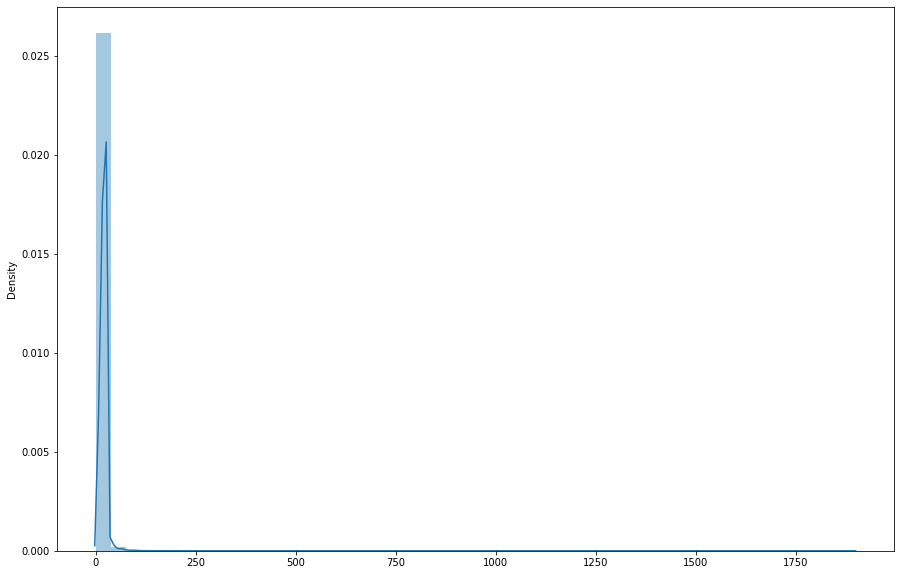

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(y)

In [12]:
y.describe()

,tip_rate
count,444642.000000
mean,19.032995
std,11.201490
min,0.000000
25%,16.504854
50%,20.000000
75%,20.000000
max,1896.551724


In [13]:
X_train = X.sample(frac=0.8,random_state=100)
X_test = X.drop(X_train.index)

y_train = y.sample(frac=0.8,random_state=100)
y_test = y.drop(y_train.index)

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
print('Intercept: \n', regressor.intercept_)

Intercept: 
 [11.36162272]


In [16]:
coef = pd.DataFrame(regressor.coef_).transpose()
col = pd.DataFrame(X.columns)
pd.concat([col, coef], axis=1)

,0,0
0,trip_distance,-3.942491
1,CMT,0.100867
2,from_airport,2.414681
3,to_airport,0.511153
4,pm,-0.219459
5,speed,0.257666
6,total_amount,0.977886
7,new_year,0.763212
8,group_ride,41.015323
9,negotiated_fare,-34.258664


In [17]:
y_pred = regressor.predict(X_test)

In [18]:
y_test = y_test['tip_rate'].reset_index(drop=True)

In [19]:
df = pd.concat([y_test, pd.DataFrame(y_pred)], axis=1)
df.head()


,tip_rate,0
0,20.000000,19.534551
1,0.000000,17.538777
2,41.666667,19.382367
3,25.060241,19.153879
4,20.000000,18.983406


In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.776583766664637
Mean Squared Error: 104.31769819567492
Root Mean Squared Error: 10.213603585203163
